<h1 style=font-size:30px><b>Seoul Bike Demand (ISE291 Project)</h1>

<br>
<h1 style=font-size:30px><b>Table of Contents</h1>
<ul>
<li><a href = "#project_details">1. Project Details</a>
    <ul>
    <li><a href = "#project_members">1.1. Project Members</a>
    <li><a href = "#project_background">1.2. Project Background</a>
    <li><a href = "#problem_statement">1.3. Problem Statement</a>
    </ul>
</li><br>

<li><a href = "#import_libraries">2. Importing Libraries</a></li><br>

<li><a href = "#data_loading">3. Data Loading and Description</a>
    <ul>
    <li><a href = "#reading_data">3.1. Reading the data</a>
    </ul>
</li><br>

<li><a href = "#data_preparation">4. Data Cleaning and Preparation</a>
    <ul>
    <li><a href = "#data_wrangling">4.1. Data Wrangling</a>
    <li><a href = "#data_cleaning">4.2. Data Cleaning</a>
    <li><a href = "#data_encoding">4.3. Data Encoding</a>
    <li><a href = "#data_imputation">4.4. Data Imputation</a>
    </ul>
</li><br>

<li><a href = "#model_planning">5. Model Planning</a>
    <ul>
    <li><a href = "#univariate_graphs">5.1. Univariate Graphs</a>
    <li><a href = "#bivariate_graphs">5.2. Bivariate Graphs</a>
    <li><a href = "#multivariate_graphs">5.3. Multivariate Graphs</a>
    <li><a href = "#summary">5.4. Summary</a>
    </ul>
</li><br>

<li><a href = "#model_building">6. Model Building & Training</a>
    <ul>
    <li><a href = "#data_scaling">6.1. Data Scaling</a>
    <li><a href = "#model_training">6.2. Model(s) Training</a>
    <li><a href = "#model_selection">6.3. Model Selection</a>
    </ul>
</li><br>

<li><a href = "#results">7. Results</a>
    <ul>
    <li><a href = "#summary_conclusion">7.1. Summary & Conclusion</a>
    <li><a href = "#future_recommendations">7.2. Future Recommendations</a>
    </ul>
</li><br>

<li><a href = "#operationalization">8. Operationalization</a>
    <ul>
    </ul>
</li><br>

<li><a href = "#references">9. References</a>
</li>
</ul>
<br><br>

<a id = 'project_details'></a><h1 style=font-size:30px><b>Project Details</h1>

<a id = 'project_members'></a><br><h2 style=font-size:20px><b><u>Project Members</u></h2>

<br>
<ol>

<li>Name: Almaan Khan<br>
     Major: Computer Science<br>
     ID: 202335270<br><br>

<li>Name: Khaled Mathbaq<br>
    Major: Computer Science<br>
    ID: 202283100<br><br>

<li>Name: Omar Alsaedi<br>
    Major: Finance<br>
    ID: 202158710<br><br>

<li>Name: Nawaf Alsewailem<br>
    Major: Aerospace Engineering<br>
    ID: 202266700<br><br>

<li>Name: Mohammed Almuhaini<br>
    Major: Mechanical Engineering<br>
    ID: 202158830<br><br>

</ol>
<br>

<a id = "project_background"></a><h2 style=font-size:20px><b><u>Project Background</u></h2>

<br>Currently, rental bikes are introduced in many urban cities for the enhancement of mobility and comfort. In cities such as Seoul, which houses nearly half the population of South Korea, it is important to make the rental bike available and accessible to the public at the right time to ensure low waiting times. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.<br><br>


<a id = 'problem_statement'></a><h2 style=font-size:20px><b><u>Problem Statement</u></h2>

<br>This project aims to predict the bike count required at each hour for the stable supply of rental bike based on environmental factors. <br><br>


<a id = 'import_libraries'></a><h1 style=font-size:30px><b>Importing Libraries</h1>

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

<a id = 'data_loading'></a><br><h1 style=font-size:30px><b>Data Loading and Description</h1>

<a id = 'reading_data'></a><h2 style=font-size:20px><b><u>Reading the Data</u></h2>

In [92]:
df = pd.read_excel("data/SeoulBikeData.xlsx")
df

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,2017-12-01,0,-5.2,37.0,2.2,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,2017-12-01,1,-5.5,NaN,0.8,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2017-12-01,2,-6.0,39.0,NaN,"2,000",-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,2017-12-01,3,-6.2,40.0,0.9,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,2017-12-01,4,-6.0,36.0,2.3,"2,000",-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34.0,2.6,"1,894",-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,2018-11-30,20,3.4,37.0,2.3,"2,000",-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,2018-11-30,21,2.6,39.0,0.3,"1,968",-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,2018-11-30,22,NaN,41.0,1.0,"1,859",-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


The fields/variables along with their data types are as follows:
<br><br>

| Column / Field / Variable |    Data type    |
|:-------------------------:|:---------------:|
|           Date            |    Datetime     | 
|           Hour            |     Integer     | 
|      Temperature(∞C)      |      Float      |
|        Humidity(%)        |      Float      |
|     Wind speed (m/s)      |      Float      |
|     Visibility (10m)      | Object (String) |
| Dew point temperature(∞C) |      Float      |
|  Solar Radiation (MJ/m2)  |      Float      |
|       Rainfall(mm)        |      Float      |
|       Snowfall (cm)       |      Float      |
|          Seasons          | Object (String) |
|          Holiday          | Object (String) |
|      Functioning Day      | Object (String) |
|      Rented Bike Count      |     Integer     |
<br>


In [93]:
#Validating the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8322 non-null   float64       
 3   Humidity(%)                8322 non-null   float64       
 4   Wind speed (m/s)           8322 non-null   float64       
 5   Visibility (10m)           8760 non-null   object        
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

<br>Descriptive summaries of columns of both data types:<br><br>

In [94]:
df.describe()

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,8760,8760.000000,8322.000000,8322.000000,8322.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,11.500000,12.902547,58.528238,1.729801,4.073813,0.569111,0.148687,0.075068,704.602055
min,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,5.750000,3.500000,42.250000,0.900000,-4.700000,0.000000,0.000000,0.000000,191.000000
50%,2018-06-01 00:00:00,11.500000,13.800000,57.000000,1.500000,5.100000,0.010000,0.000000,0.000000,504.500000
75%,2018-08-31 00:00:00,17.250000,22.500000,74.000000,2.300000,14.800000,0.930000,0.000000,0.000000,1065.250000
max,2018-11-30 00:00:00,23.000000,39.400000,700.000000,7.400000,27.200000,3.520000,35.000000,8.800000,3556.000000
std,NaN,6.922582,11.958612,23.212680,1.038008,13.060369,0.868746,1.128193,0.436746,644.997468


In [95]:
df.select_dtypes(include='object').describe()

,Visibility (10m),Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,1789,4,2,2
top,"2,000",Spring,No Holiday,Yes
freq,2245,2208,8328,8465


In [96]:
df.nunique().sort_values(ascending=True)

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               64
Humidity(%)                    97
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(∞C)               545
Dew point temperature(∞C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

<br>Let's see the number and percentage of missing/NaN values in each column<br><br>

In [97]:
missing_values= df.isnull().sum()
missing_values

Date                           0
Hour                           0
Temperature(∞C)              438
Humidity(%)                  438
Wind speed (m/s)             438
Visibility (10m)               0
Dew point temperature(∞C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
Rented Bike Count              0
dtype: int64

In [98]:
# Percentage of missing/NaN values in each column
print(f"Percentage of missing values in each column:")
print(f"{(df.isnull().sum()/len(df)) * 100}")

Percentage of missing values in each column:
Date                         0.0
Hour                         0.0
Temperature(∞C)              5.0
Humidity(%)                  5.0
Wind speed (m/s)             5.0
Visibility (10m)             0.0
Dew point temperature(∞C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
Rented Bike Count            0.0
dtype: float64


<a id = 'data_preparation'></a><br><h1 style=font-size:30px><b>Data Cleaning & Preparation</h1>

<a id = 'data_wrangling'></a><h2 style=font-size:20px><b><u>Data Wrangling</u></h2>

In [99]:
df["Visibility (10m)"]=df["Visibility (10m)"].apply(lambda x: int(x.replace(",","")))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8322 non-null   float64       
 3   Humidity(%)                8322 non-null   float64       
 4   Wind speed (m/s)           8322 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

In [100]:
df.insert(1, "Month", df["Date"].dt.month)
df.insert(2, "Day", df["Date"].dt.day_name())
df.drop(columns=["Date"], inplace=True)
df

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,12,Friday,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,12,Friday,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,12,Friday,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,Friday,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,11,Friday,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,11,Friday,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,11,Friday,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


<a id = 'data_cleaning'></a><h2 style=font-size:20px><b><u>Data Cleaning</u></h2>

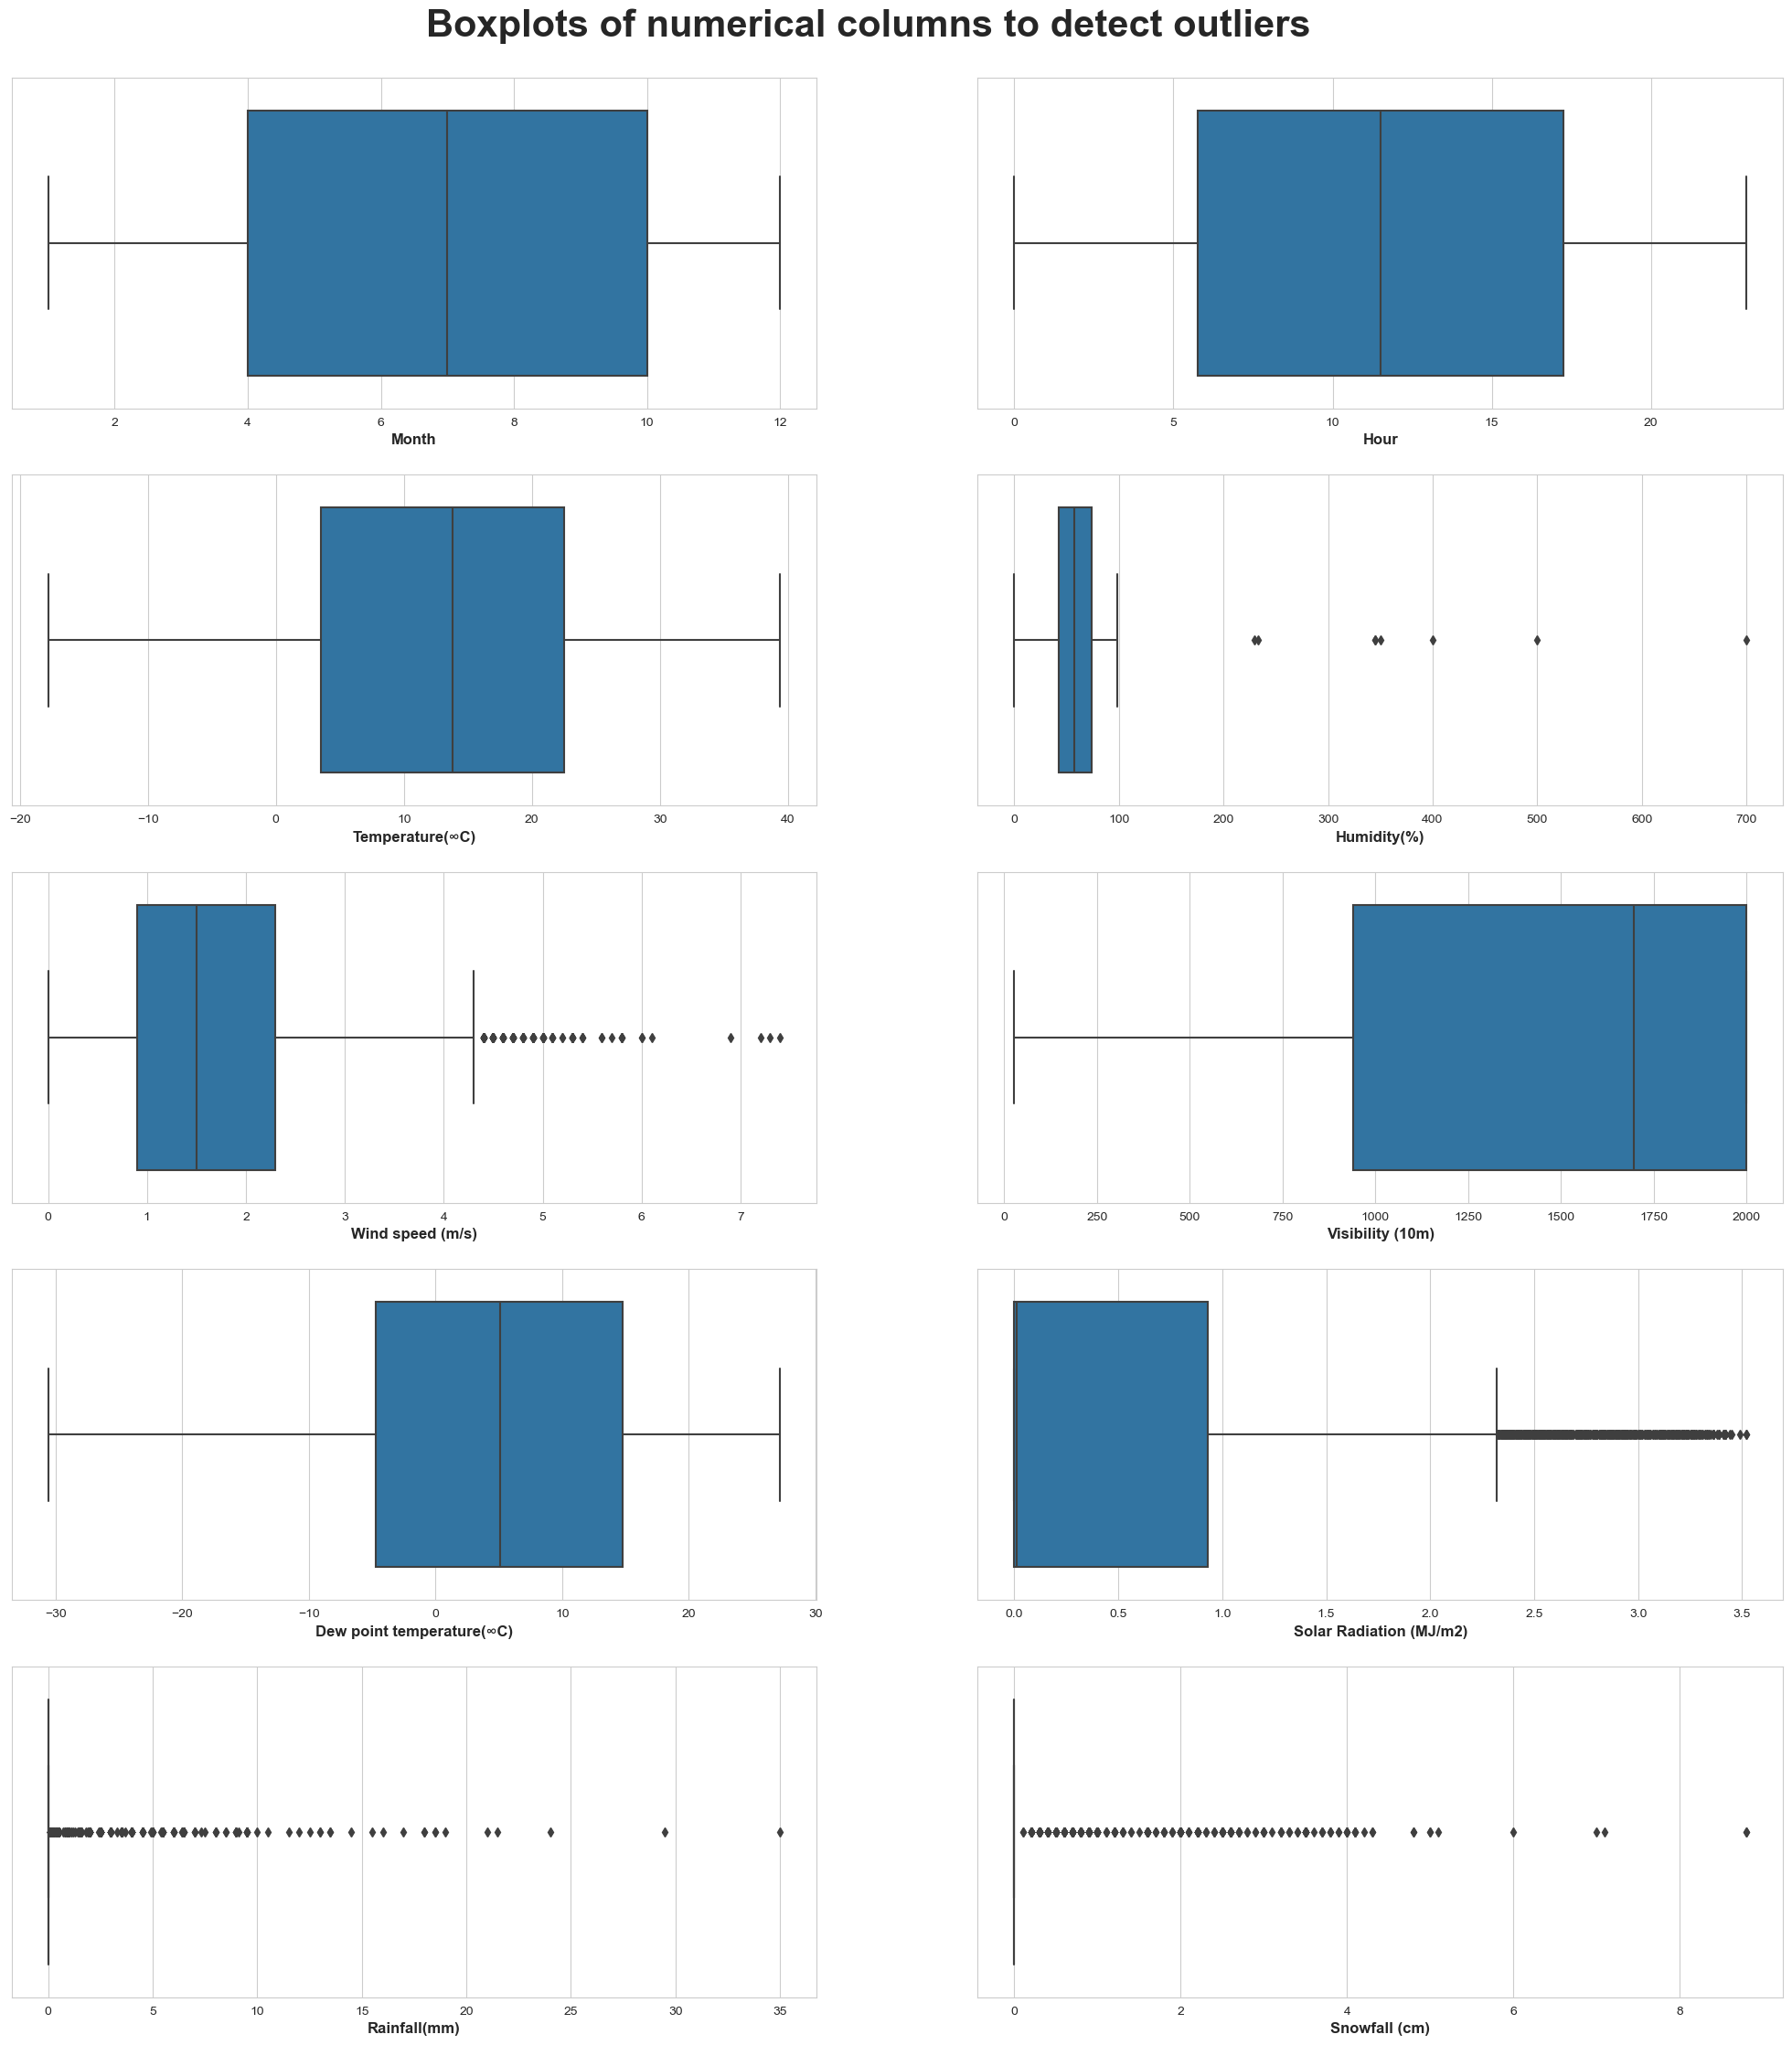

In [101]:
numerical_columns = df.select_dtypes(include = 'number').columns.drop(["Rented Bike Count"])
fig, axes = plt.subplots(nrows = len(numerical_columns) // 2 , ncols = 2, figsize = (25,25))

for index, column in enumerate(numerical_columns):
    sns.boxplot(data = df, x = column, ax = axes.flatten()[index])
    axes.flatten()[index].set_xlabel(f"{column}", fontweight='bold', fontsize='large')

plt.suptitle("Boxplots of numerical columns to detect outliers", fontsize = 30, fontweight = 'bold')
plt.subplots_adjust(top = 0.95)
plt.show()

In [102]:
IQR = df["Temperature(∞C)"].quantile(0.75) - df["Temperature(∞C)"].quantile(0.25)
upper_whisker = df['Temperature(∞C)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Temperature(∞C)'].quantile(0.25) - 1.5*IQR
display(df[(df['Temperature(∞C)'] > upper_whisker) | (df['Temperature(∞C)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above indicates that there are no outliers in the Temperature column.<br><br>


In [103]:
IQR = df["Humidity(%)"].quantile(0.75, interpolation = 'linear') - df["Humidity(%)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df['Humidity(%)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Humidity(%)'].quantile(0.25) - 1.5*IQR
display(df[(df['Humidity(%)'] > upper_whisker) | (df['Humidity(%)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
71,12,Sunday,23,3.9,500.0,1.3,194,2.4,0.00,0.0,0.0,Winter,No Holiday,Yes,303
79,12,Monday,7,0.2,700.0,3.4,702,-5.0,0.00,0.0,0.0,Winter,No Holiday,Yes,498
111,12,Tuesday,15,-0.7,400.0,0.0,2000,-16.9,0.00,0.0,0.0,Winter,No Holiday,Yes,353
138,12,Wednesday,18,1.7,350.0,1.0,66,0.2,0.00,0.3,0.3,Winter,No Holiday,Yes,204
172,12,Friday,4,-5.3,230.0,2.4,1936,-13.4,0.00,0.0,0.0,Winter,No Holiday,Yes,71
224,12,Sunday,8,-0.2,233.0,1.2,378,-1.6,0.00,0.0,4.1,Winter,No Holiday,Yes,35
291,12,Wednesday,3,-10.9,345.0,1.8,1913,-18.1,0.00,0.0,0.0,Winter,No Holiday,Yes,79
4926,6,Sunday,6,20.2,345.0,2.0,255,17.9,0.01,0.0,0.0,Summer,No Holiday,Yes,258


<br>The above are the outliers in the Humidity column.<br><br>

In [104]:
IQR = df["Wind speed (m/s)"].quantile(0.75, interpolation = 'linear') - df["Wind speed (m/s)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df['Wind speed (m/s)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Wind speed (m/s)'].quantile(0.25) - 1.5*IQR
display(df[(df['Wind speed (m/s)'] > upper_whisker) | (df['Wind speed (m/s)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
82,12,Monday,10,-1.1,40.0,4.5,2000,-13.0,0.64,0.0,0.0,Winter,No Holiday,Yes,311
84,12,Monday,12,-0.3,38.0,4.8,1823,-12.9,1.11,0.0,0.0,Winter,No Holiday,Yes,393
85,12,Monday,13,0.0,30.0,5.4,1938,-15.5,1.17,0.0,0.0,Winter,No Holiday,Yes,391
86,12,Monday,14,0.1,27.0,4.5,2000,-16.7,1.09,0.0,0.0,Winter,No Holiday,Yes,338
87,12,Monday,15,-0.1,NaN,5.8,2000,-17.8,0.88,0.0,0.0,Winter,No Holiday,Yes,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,10,Saturday,13,10.6,38.0,4.6,2000,-3.1,1.63,0.0,0.0,Autumn,No Holiday,Yes,1118
7934,10,Saturday,14,10.8,37.0,4.4,2000,-3.3,1.29,0.0,0.0,Autumn,No Holiday,Yes,1183
7937,10,Saturday,17,9.5,34.0,5.7,2000,-5.6,0.45,0.0,0.0,Autumn,No Holiday,Yes,1176
7985,10,Monday,17,10.0,43.0,4.9,2000,-2.0,0.43,0.0,0.0,Autumn,No Holiday,Yes,1274


<br>The above are the outliers in the Wind speed column.<br><br>

In [105]:
IQR = df["Visibility (10m)"].quantile(0.75, interpolation = 'linear') - df["Visibility (10m)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df['Visibility (10m)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Visibility (10m)'].quantile(0.25) - 1.5*IQR
display(df[(df['Visibility (10m)'] > upper_whisker) | (df['Visibility (10m)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above indicates that there are no outliers in the Visibility column.<br><br>

In [106]:
IQR = df["Dew point temperature(∞C)"].quantile(0.75, interpolation = 'linear') - df["Dew point temperature(∞C)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df['Dew point temperature(∞C)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Dew point temperature(∞C)'].quantile(0.25) - 1.5*IQR
display(df[(df['Dew point temperature(∞C)'] > upper_whisker) | (df['Dew point temperature(∞C)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above indicates that there are no outlier in the Dew point temperature column.<br><br>

In [107]:
IQR = df["Solar Radiation (MJ/m2)"].quantile(0.75, interpolation = 'linear') - df["Solar Radiation (MJ/m2)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df['Solar Radiation (MJ/m2)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Solar Radiation (MJ/m2)'].quantile(0.25) - 1.5*IQR
display(df[(df['Solar Radiation (MJ/m2)'] > upper_whisker) | (df['Solar Radiation (MJ/m2)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
1741,2,Sunday,13,-2.4,28.0,3.0,1953,-18.4,2.35,0.0,0.0,Winter,No Holiday,Yes,212
1885,2,Saturday,13,-0.4,15.0,2.4,1938,-23.9,2.46,0.0,0.0,Winter,Holiday,Yes,193
1886,2,Saturday,14,-0.1,15.0,4.0,2000,-23.7,2.39,0.0,0.0,Winter,Holiday,Yes,258
1982,2,Wednesday,14,3.3,14.0,2.9,1985,-21.7,2.49,0.0,0.0,Winter,No Holiday,Yes,365
2054,2,Saturday,14,6.9,19.0,1.9,1843,-15.1,2.36,0.0,0.0,Winter,No Holiday,Yes,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,10,Friday,13,NaN,33.0,1.8,2000,2.2,2.43,0.0,0.0,Autumn,No Holiday,Yes,1190
7764,10,Saturday,12,17.7,33.0,2.2,1556,1.2,2.37,0.0,0.0,Autumn,No Holiday,Yes,1407
7765,10,Saturday,13,NaN,26.0,1.1,1942,-0.6,2.45,0.0,0.0,Autumn,No Holiday,Yes,1585
7788,10,Sunday,12,18.4,28.0,1.9,1690,-0.4,2.33,0.0,0.0,Autumn,No Holiday,Yes,1417


<br>The above are the outliers in the Solar Radiation column.<br><br>

In [108]:
IQR = df["Rainfall(mm)"].quantile(0.75, interpolation = 'linear') - df["Rainfall(mm)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df['Rainfall(mm)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Rainfall(mm)'].quantile(0.25) - 1.5*IQR
display(df[(df['Rainfall(mm)'] > upper_whisker) | (df['Rainfall(mm)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
51,12,Sunday,3,3.4,71.0,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,117
54,12,Sunday,6,3.4,86.0,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,13
57,12,Sunday,9,3.5,91.0,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,152
78,12,Monday,6,1.2,76.0,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,200
120,12,Wednesday,0,-2.8,77.0,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,11,Friday,9,10.8,78.0,2.6,1985,7.1,0.13,0.5,0.0,Autumn,No Holiday,No,0
8520,11,Wednesday,0,7.2,74.0,1.2,772,2.8,0.00,0.2,0.0,Autumn,No Holiday,Yes,119
8523,11,Wednesday,3,6.5,87.0,1.0,710,4.4,0.00,1.0,0.0,Autumn,No Holiday,Yes,112
8601,11,Saturday,9,0.3,97.0,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes,24


<br>The above are the outliers in the Rainfall column.<br><br>

In [109]:
IQR = df["Snowfall (cm)"].quantile(0.75, interpolation = 'linear') - df["Snowfall (cm)"].quantile(0.25, interpolation = 'linear')
upper_whisker = df["Snowfall (cm)"].quantile(0.75) + 1.5*IQR
lower_whisker = df["Snowfall (cm)"].quantile(0.25) - 1.5*IQR
display(df[(df['Snowfall (cm)'] > upper_whisker) | (df['Snowfall (cm)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
120,12,Wednesday,0,-2.8,77.0,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,145
121,12,Wednesday,1,-3.0,79.0,0.0,293,-6.1,0.00,0.0,0.3,Winter,No Holiday,Yes,144
122,12,Wednesday,2,-3.0,NaN,0.0,1862,-6.1,0.00,0.0,0.4,Winter,No Holiday,Yes,117
123,12,Wednesday,3,-3.2,NaN,0.0,1808,-6.4,0.00,0.2,0.4,Winter,No Holiday,Yes,78
124,12,Wednesday,4,-3.4,75.0,0.0,1982,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,11,Monday,5,2.1,88.0,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes,115
8646,11,Monday,6,1.8,88.0,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,339
8647,11,Monday,7,1.7,89.0,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,819
8648,11,Monday,8,NaN,84.0,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes,1524


<br>The above are the outliers in the Snowfall column.<br><br>

<br>Let's remove the rows containing outliers in any of the numerical columns.<br><br>


In [110]:
numerical_columns = df.select_dtypes(exclude = 'object').columns.drop(["Month", 'Hour', "Rented Bike Count"])

IQR = df[numerical_columns].quantile(0.75, interpolation = 'linear') - df[numerical_columns].quantile(0.25, interpolation = 'linear')
upper_whisker = df[numerical_columns].quantile(0.75, interpolation = 'linear') + 1.5 * IQR
lower_whisker = df[numerical_columns].quantile(0.25, interpolation = 'linear') - 1.5 * IQR
    
is_outlier = (df[numerical_columns] > upper_whisker) | (df[numerical_columns] < lower_whisker)
outliers = is_outlier.any(axis = 1)
display(df[outliers])

outliers_indices = []
for a, b in enumerate(outliers):
    if b == True:
        outliers_indices.append(a)

df.drop(axis='index', index=outliers_indices, inplace=True)

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
51,12,Sunday,3,3.4,71.0,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,117
54,12,Sunday,6,3.4,86.0,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,13
57,12,Sunday,9,3.5,91.0,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,152
71,12,Sunday,23,3.9,500.0,1.3,194,2.4,0.00,0.0,0.0,Winter,No Holiday,Yes,303
78,12,Monday,6,1.2,76.0,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,11,Monday,5,2.1,88.0,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes,115
8646,11,Monday,6,1.8,88.0,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,339
8647,11,Monday,7,1.7,89.0,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,819
8648,11,Monday,8,NaN,84.0,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes,1524


df after the removal of outliers:



,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,12,Friday,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,12,Friday,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,12,Friday,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,Friday,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,11,Friday,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,11,Friday,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,11,Friday,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


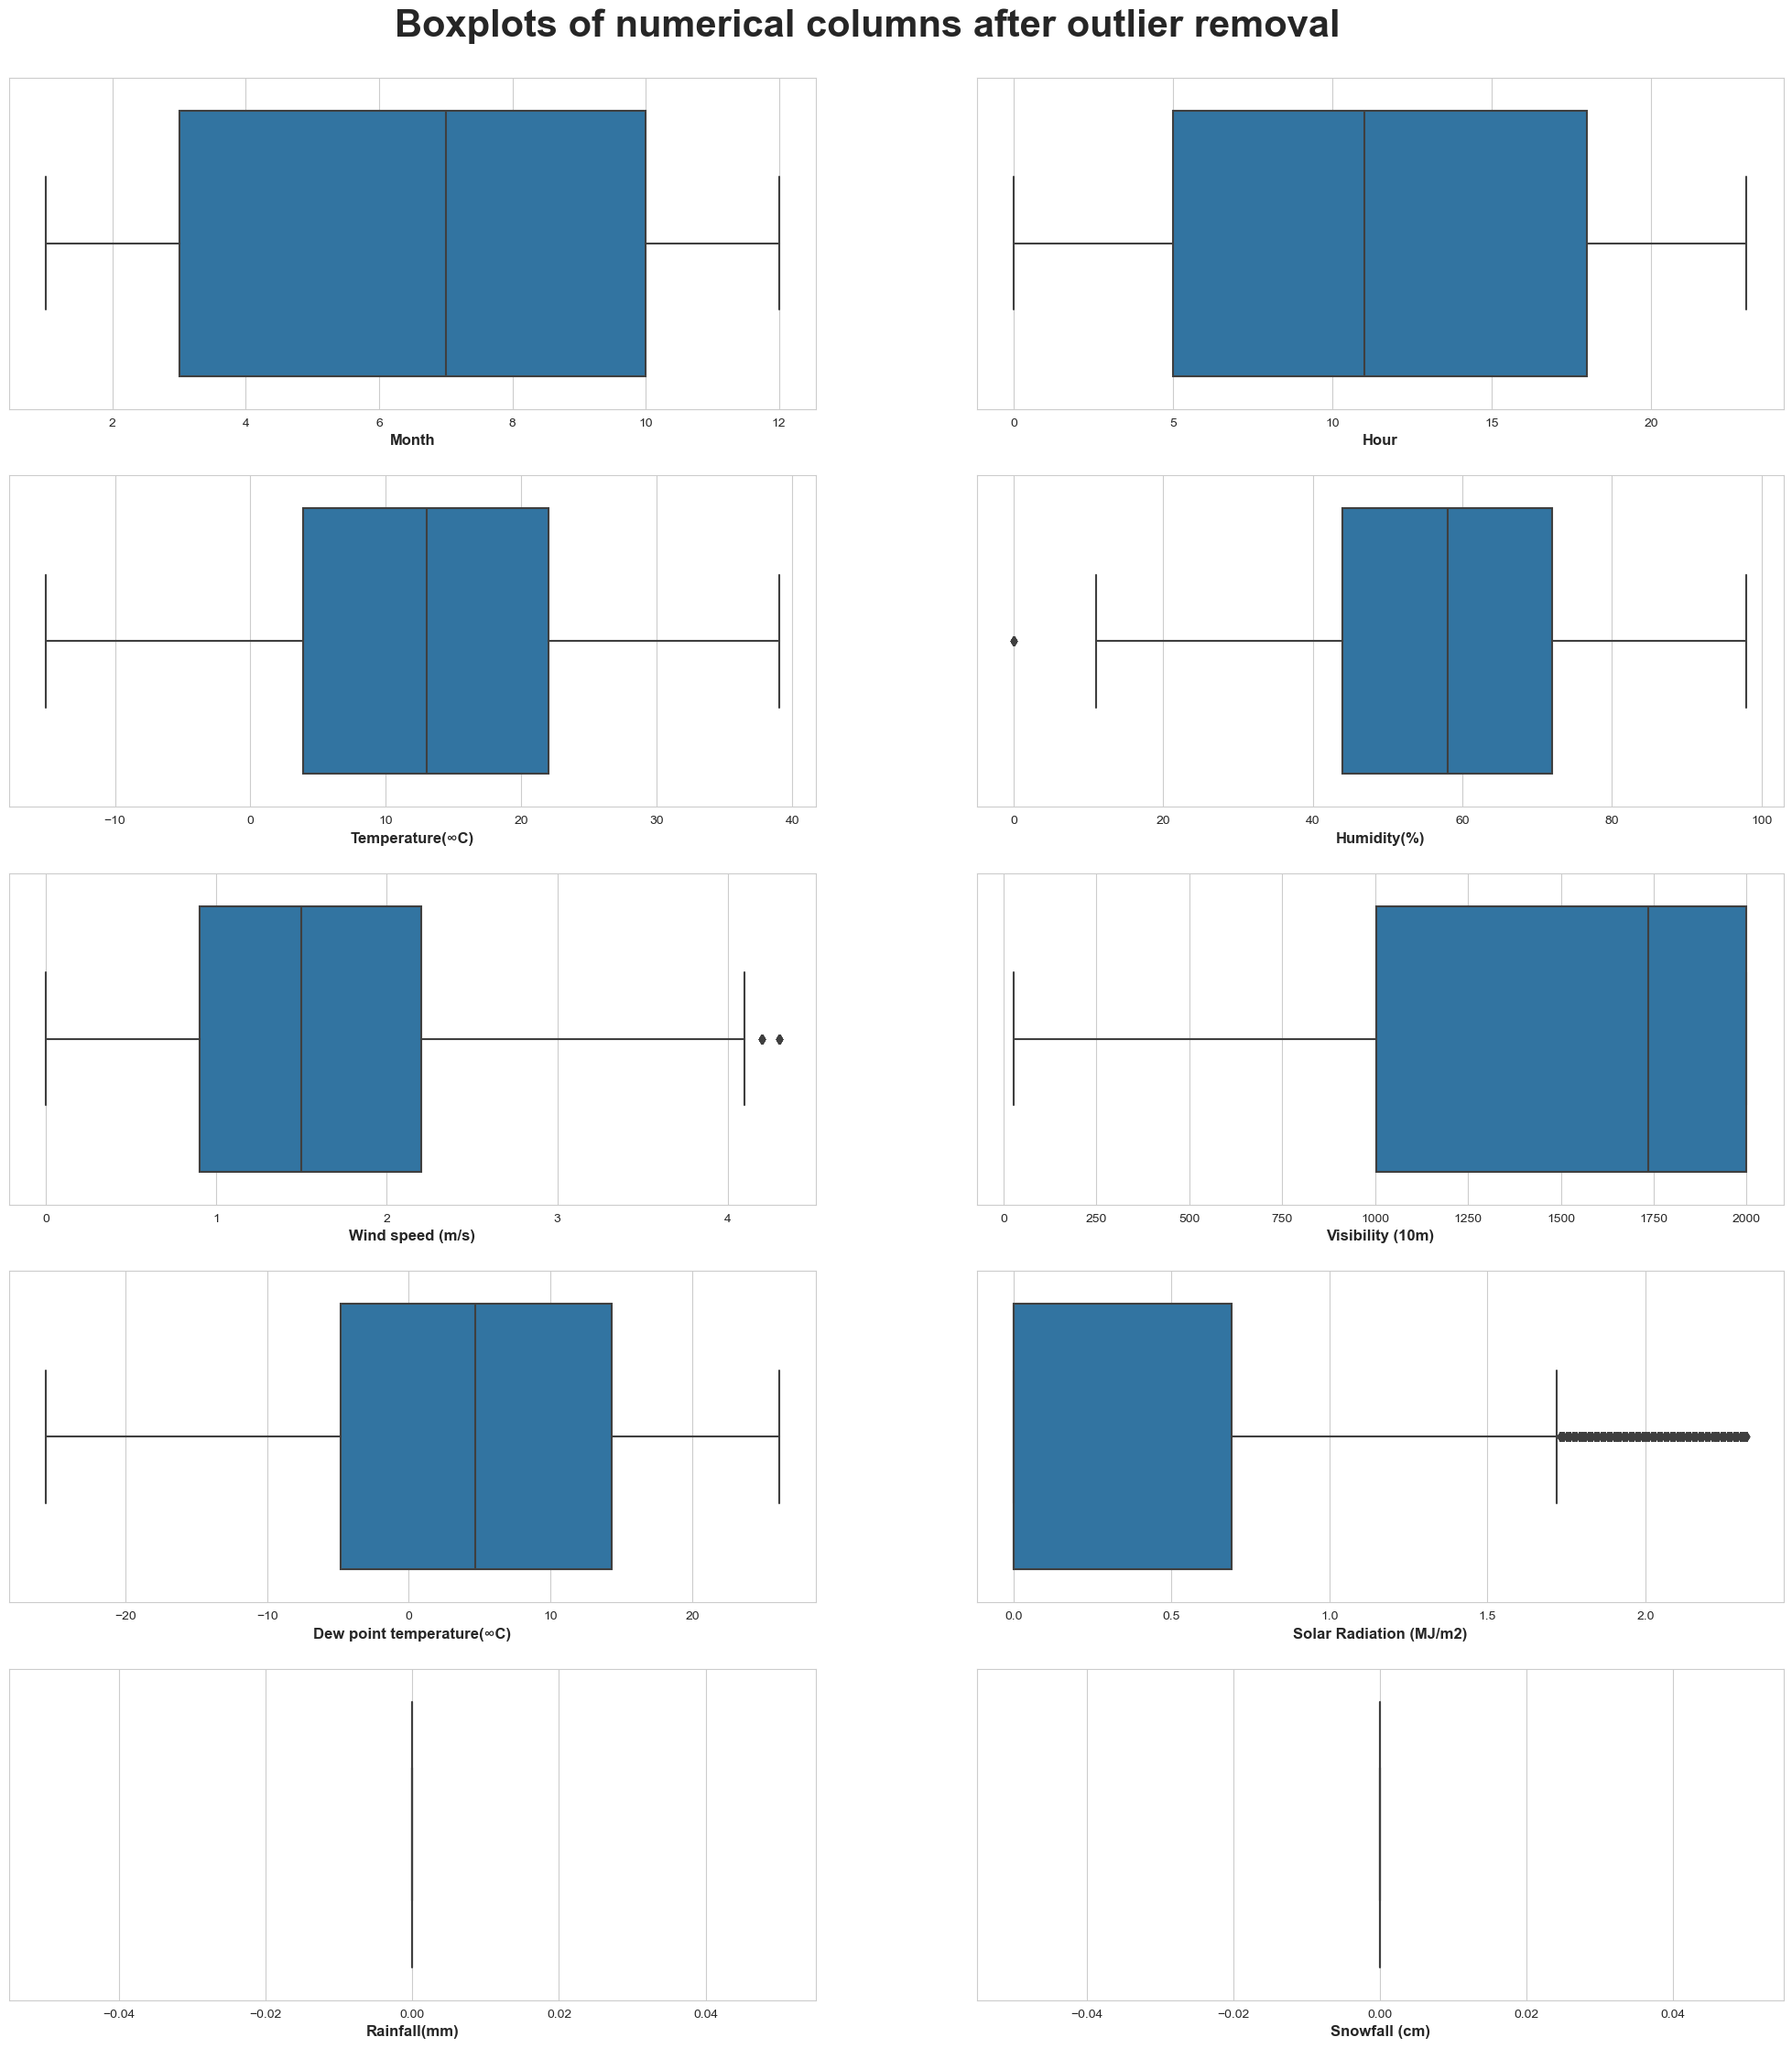

In [111]:
print(f"df after the removal of outliers:\n")
display(df)
print("\n")

numerical_columns = df.select_dtypes(include = 'number').columns.drop(["Rented Bike Count"])
fig, axes = plt.subplots(nrows = len(numerical_columns) // 2 , ncols = 2, figsize = (25,25))

for index, column in enumerate(numerical_columns):
    sns.boxplot(data = df, x = column, ax = axes.flatten()[index])
    axes.flatten()[index].set_xlabel(f"{column}", fontweight='bold', fontsize='large')

plt.suptitle("Boxplots of numerical columns after outlier removal", fontsize = 30, fontweight = 'bold')
plt.subplots_adjust(top = 0.95)
plt.show()

<br>As it can be seen from the boxplots, all the columns have had most of their outliers removed (excluding the "Rented Bike Count" column, since it is the output column).<br><br>

<a id = 'data_encoding'></a><h2 style=font-size:20px><b><u>Data Encoding</u></h2>

<br>Now, let's change the categorical columns to numerical columns<br><br>

In [112]:
df.reset_index(drop = True, inplace = True) # Resetting the indices to start from 0 again
df_original_copy = df.copy() # Creating a copy of the dataset with the original categorical columns for later plotting

In [113]:
# Displaying the categorical columns
display(df.select_dtypes(include='object'))

,Day,Seasons,Holiday,Functioning Day
0,Friday,Winter,No Holiday,Yes
1,Friday,Winter,No Holiday,Yes
2,Friday,Winter,No Holiday,Yes
3,Friday,Winter,No Holiday,Yes
4,Friday,Winter,No Holiday,Yes
...,...,...,...,...
7070,Friday,Autumn,No Holiday,Yes
7071,Friday,Autumn,No Holiday,Yes
7072,Friday,Autumn,No Holiday,Yes
7073,Friday,Autumn,No Holiday,Yes


<br>The above are the categorical columns in the dataset<br><br>

<br>Now, let's see the unique categories and their numbers in each of these columns<br><br>

In [114]:
unique_values = df.select_dtypes(include = "object").apply(lambda x: x.unique())
print(unique_values, end="\n\n")

for column in df.select_dtypes(include = "object").columns:
    print(f"{column}: {df[column].nunique()} unique categories")

print("\n\nCounts of each categories in each categorical column:\n")
    
for column in df.select_dtypes(include = "object").columns:
    print(f"{df[column].value_counts()}\n\n")

Day                [Friday, Saturday, Sunday, Monday, Tuesday, We...
Seasons                             [Winter, Spring, Summer, Autumn]
Holiday                                        [No Holiday, Holiday]
Functioning Day                                            [Yes, No]
dtype: object

Day: 7 unique categories
Seasons: 4 unique categories
Holiday: 2 unique categories
Functioning Day: 2 unique categories


Counts of each categories in each categorical column:

Day
Friday       1036
Sunday       1034
Tuesday      1031
Monday       1003
Thursday     1001
Saturday      996
Wednesday     974
Name: count, dtype: int64


Seasons
Autumn    1919
Spring    1734
Summer    1733
Winter    1689
Name: count, dtype: int64


Holiday
No Holiday    6726
Holiday        349
Name: count, dtype: int64


Functioning Day
Yes    6815
No      260
Name: count, dtype: int64




<br>We can observe the following:
<ul>
<li>Day column has 7 unique categories

<li>Seasons column has 4 unique categories

<li>Holiday column has 2 unique categories making it a binary categorical column

<li>Similarly, Functioning day column has 2 unique categories making it a binary categorical column
</ul>
<br>For the <b><i>Holiday</i></b> and <b><i>Functioning day</i></b> columns, it is best to use <b><i>"One Hot Encoding"</i></b>.
<br>For the <b><i>Days</i></b> and <b><i>Seasons</i></b> columns, <b><i>"Mapping"</i></b> will be more suitable due to an intrinsic order amongst the categories.

<br><br>

<br>Let's perform One Hot Encoding first.<br><br>

In [115]:
df = pd.get_dummies(df, columns = ['Holiday', 'Functioning Day'], drop_first=True)
display(df)
# Converting the boolean one hot encoding columns to numerical datatype
boolean_cols =  df.select_dtypes(include = 'bool').columns
df[boolean_cols] = df[boolean_cols].astype('int')
print("\n\n")
display(df)

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Rented Bike Count,Holiday_No Holiday,Functioning Day_Yes
0,12,Friday,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,254,True,True
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,Winter,204,True,True
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,Winter,173,True,True
3,12,Friday,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,107,True,True
4,12,Friday,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,78,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,11,Friday,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,1003,True,True
7071,11,Friday,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,764,True,True
7072,11,Friday,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,694,True,True
7073,11,Friday,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,712,True,True


,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Rented Bike Count,Holiday_No Holiday,Functioning Day_Yes
0,12,Friday,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,254,1,1
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,Winter,204,1,1
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,Winter,173,1,1
3,12,Friday,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,107,1,1
4,12,Friday,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,78,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,11,Friday,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,1003,1,1
7071,11,Friday,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,764,1,1
7072,11,Friday,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,694,1,1
7073,11,Friday,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,712,1,1


<br>Now, let's perform Mapping on the remaining categorical columns.<br><br>

In [116]:
days_map = {"Sunday": 1, "Monday": 2, "Tuesday": 3, "Wednesday": 4, "Thursday": 5, "Friday": 6, "Saturday": 7}
seasons_map = {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4}

df_og_copy = df.copy() # Making a copy of the categorical columns for later plotting

df['Day'] = df['Day'].map(days_map)
df['Seasons'] = df['Seasons'].map(seasons_map)

# Reordering the columns to have the output (Rented Bike Count) column at the end
columns = df.columns.tolist()
columns.remove("Rented Bike Count")
columns.append("Rented Bike Count")
df = df[columns]

display(df)

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count
0,12,6,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,4,1,1,254
1,12,6,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,4,1,1,204
2,12,6,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,4,1,1,173
3,12,6,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,4,1,1,107
4,12,6,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,4,1,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,11,6,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,3,1,1,1003
7071,11,6,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,3,1,1,764
7072,11,6,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,3,1,1,694
7073,11,6,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,3,1,1,712


<br>As observed, we have converted all the categorical columns to the numeric datatypes. This will be crucial when we will be training our models.<br><br>

<a id = 'data_imputation'></a><h2 style=font-size:20px><b><u>Data Imputation</u></h2>

<br>Let's find out and display the rows that contain missing/NaN values.<br><br>

In [117]:
null_rows = df[df.isna().any(axis=1)]
display(null_rows)

print("\n\n")

df.info()

print("\n\n")
print("Missing (NaN) values percentages in each column:\n")

missing_percentage = df.isna().mean() * 100
print(missing_percentage)

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count
1,12,6,1,-5.5,NaN,0.8,2000,-17.6,0.00,0.0,0.0,4,1,1,204
2,12,6,2,-6.0,39.0,NaN,2000,-17.7,0.00,0.0,0.0,4,1,1,173
14,12,6,14,NaN,26.0,2.0,2000,-14.6,1.01,0.0,0.0,4,1,1,447
17,12,6,17,NaN,58.0,1.6,2000,-6.5,0.08,0.0,0.0,4,1,1,555
19,12,6,19,0.0,NaN,1.7,2000,-3.5,0.00,0.0,0.0,4,1,1,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,11,5,14,6.0,NaN,0.6,1452,-11.6,0.34,0.0,0.0,3,1,1,668
7053,11,6,2,0.6,66.0,NaN,1368,-5.0,0.00,0.0,0.0,3,1,1,300
7060,11,6,9,-0.4,NaN,0.6,1270,-7.8,0.45,0.0,0.0,3,1,1,809
7068,11,6,17,NaN,29.0,2.1,1877,-10.7,0.23,0.0,0.0,3,1,1,1047





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075 entries, 0 to 7074
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      7075 non-null   int32  
 1   Day                        7075 non-null   int64  
 2   Hour                       7075 non-null   int64  
 3   Temperature(∞C)            6714 non-null   float64
 4   Humidity(%)                6722 non-null   float64
 5   Wind speed (m/s)           6716 non-null   float64
 6   Visibility (10m)           7075 non-null   int64  
 7   Dew point temperature(∞C)  7075 non-null   float64
 8   Solar Radiation (MJ/m2)    7075 non-null   float64
 9   Rainfall(mm)               7075 non-null   float64
 10  Snowfall (cm)              7075 non-null   float64
 11  Seasons                    7075 non-null   int64  
 12  Holiday_No Holiday         7075 non-null   int64  
 13  Functioning Day_Yes        7075 non-null   in

<br>As can be seen from the output, the Temperature, Humidity, and the Wind Speed columns are missing (NaN) approximately 5% of their values respectively.<br><br>

<br>Now, let's impute the missing values with the means/medians of the corresponding columns. Since, we have already removed the outliers, the imputed means in the numerical columns will be more accurate to the dataset due to no influence from outliers.<br><br>

In [118]:
null_columns = df.columns[df.isna().any()] # Storing all the columns containing atleast one NaN value
for c in null_columns:
    if df[c].dtype != 'object':
        value = df[c].mean()
    else:
        value = df[c].mode()[0]
        
    df[c] = df[c].fillna(value)

In [119]:
null_rows = df[df.isna().any(axis=1)]
display(null_rows)

print("\n\n")

df.info()

print("\n\n")
print("Missing (NaN) values percentages in each column after data imputation:\n")

missing_percentage = df.isna().mean() * 100
print(missing_percentage)

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075 entries, 0 to 7074
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      7075 non-null   int32  
 1   Day                        7075 non-null   int64  
 2   Hour                       7075 non-null   int64  
 3   Temperature(∞C)            7075 non-null   float64
 4   Humidity(%)                7075 non-null   float64
 5   Wind speed (m/s)           7075 non-null   float64
 6   Visibility (10m)           7075 non-null   int64  
 7   Dew point temperature(∞C)  7075 non-null   float64
 8   Solar Radiation (MJ/m2)    7075 non-null   float64
 9   Rainfall(mm)               7075 non-null   float64
 10  Snowfall (cm)              7075 non-null   float64
 11  Seasons                    7075 non-null   int64  
 12  Holiday_No Holiday         7075 non-null   int64  
 13  Functioning Day_Yes        7075 non-null   in

<a id = 'model_planning'></a><br><h1 style=font-size:30px><b>Model Planning</h1>

In [120]:
df.groupby("Day")["Rented Bike Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
1,1034.0,645.689555,616.705015,0.0,177.00,422.5,940.25,2514.0
2,1003.0,798.481555,692.806683,4.0,227.00,600.0,1203.00,3380.0
3,1031.0,743.482056,674.922722,0.0,217.50,556.0,1112.50,3556.0
4,974.0,811.321355,702.405020,0.0,245.75,612.0,1180.75,3384.0
5,1001.0,754.866134,669.867132,0.0,231.00,564.0,1123.00,3418.0
6,1036.0,792.947876,685.548220,0.0,272.75,576.5,1188.75,3365.0
7,996.0,703.642570,595.540704,0.0,232.00,511.5,1025.00,2497.0


<a id = 'univariate_graphs'></a><h2 style=font-size:20px><b><u>Univariate Graphs</u></h2>

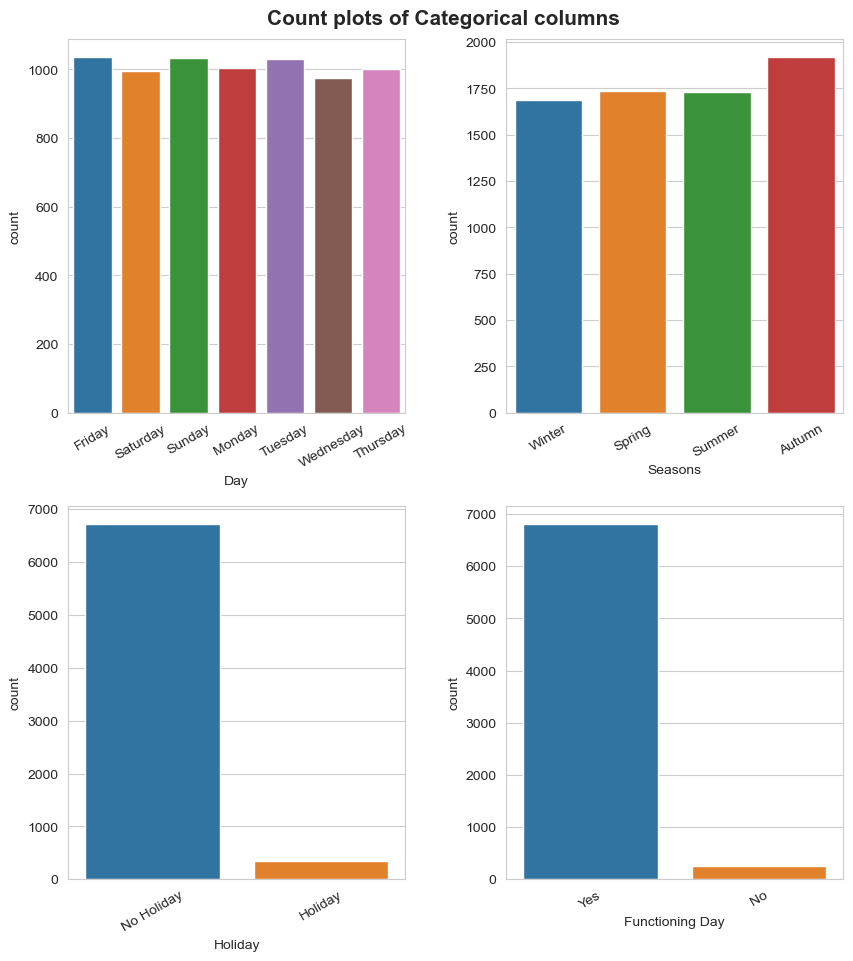

In [121]:
#univariate graphs for categorical columns
obj_columns = df_original_copy.select_dtypes('object').columns

fig,axes = plt.subplots(len(obj_columns) // 2, 2, figsize=(10, 10))
for index, column in enumerate(obj_columns):
        sns.countplot(x=column, data=df_original_copy, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        axes.flatten()[index].set_xticklabels(axes.flatten()[index].get_xticklabels(), rotation=30)
        
plt.suptitle('Count plots of Categorical columns', fontsize= 15, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.25, wspace = 0.3)
plt.show()
    

<br>
<ul>
<li>The count plot for 'Season' has the highest number of bike rental users during summer

<li>The plot for the 'Holiday' column might suggest that casual bike rentals are higher on non-holidays compared to holidays. It could give the implication that people basically use bikes to get to work rather than for leisure.

<li>The count plot for 'Functioning Day' may show the user that bike rentals are invariably high whenever the bike rental system is functioning. This is understandable and illustrates the importance of the system being available to ensure rental numbers.

<li>The rentals of bikes are at their peak in the summer, thus stating that biking behavior has a very strong seasonal trend. Furthermore, higher rentals on non-holidays reflect that bicycles are mostly used for commuting.
</ul>
<br><br>

/Users/almaan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/almaan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/almaan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/almaan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

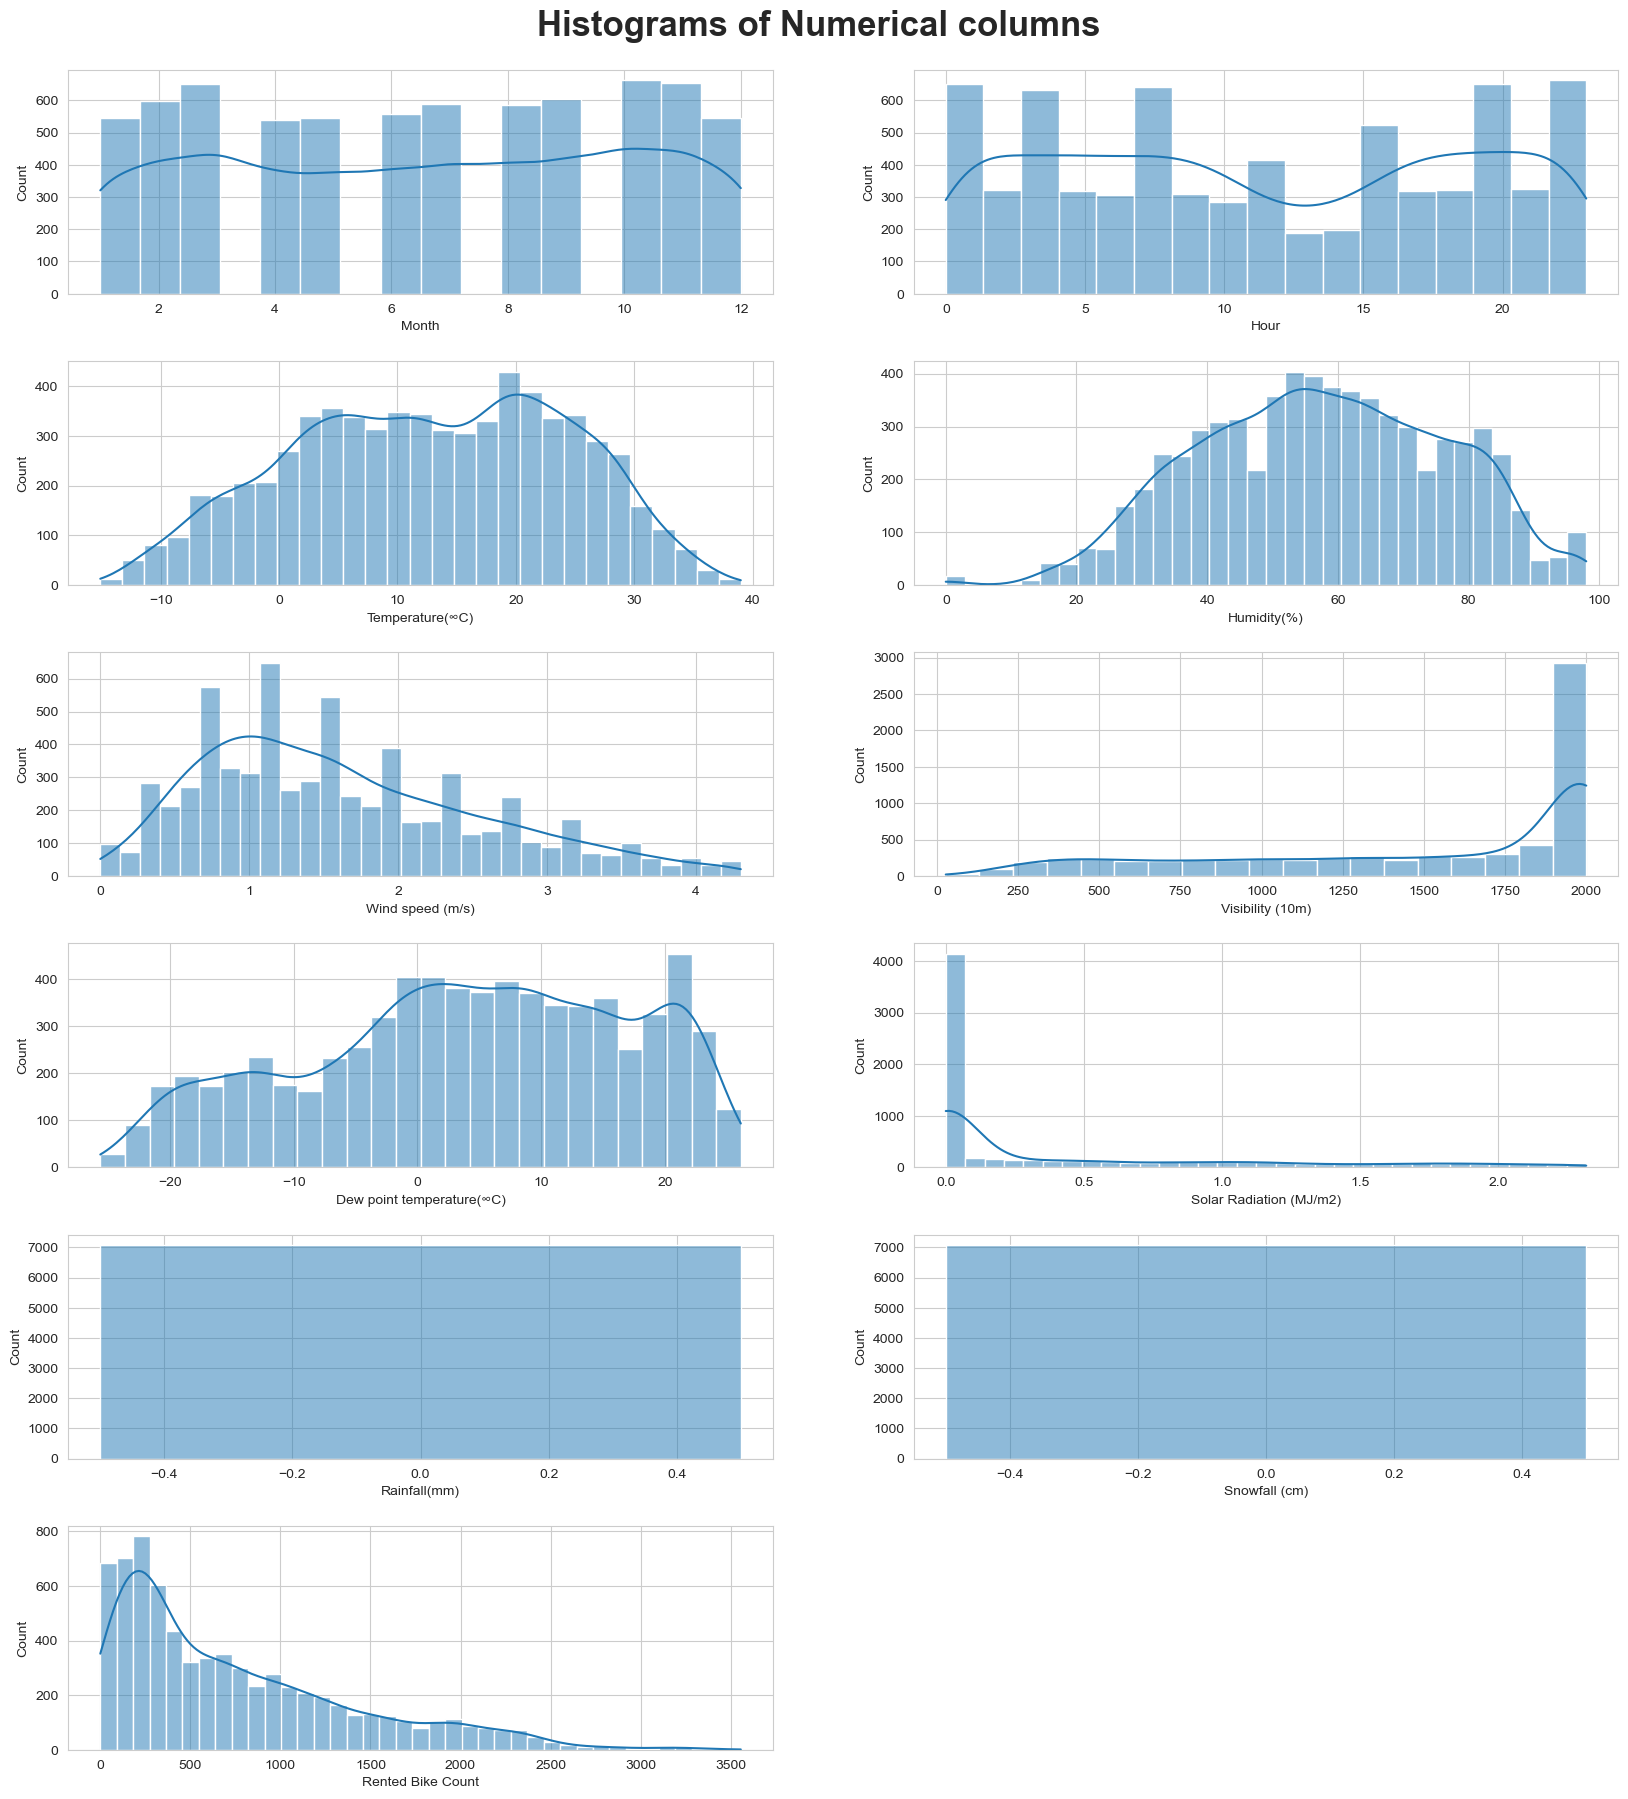

In [122]:
numerical_columns =  df_original_copy.select_dtypes('number').columns

fig,axes = plt.subplots(len(numerical_columns) // 2 + 1 , 2, figsize=(20, 20))
for index, column in enumerate(numerical_columns):
        sns.histplot(x=column,data=df_original_copy, kde = True, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        
fig.delaxes(axes.flatten()[index + 1])
plt.suptitle('Histograms of Numerical columns', fontsize= 25, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.show()

<br>
<ul>
<li>Temperature follows at least approximately the normal distribution centering around 15°C, whereas humidity peaks roughly between 60-80%, indicating generally mild temperatures and rather high to moderate humidity.

<li>Both wind speed and solar radiation are right-skewed. Most wind speeds are low, and most days have low solar radiation.

<li>Both Rainfall and Snofall are highly right-skewed, indicating that most days have little to no rainfall or snowfall.

<li>Distributions of numerical columns of this dataset show that weather is mostly mild, the relative humidity is moderate to high, wind speed is low, and solar radiation is low; the rainfall and snowfall are infrequent, although sometimes heavy. This information is essential for understanding the conditions within which bike renting is occurring and developing a predictive model.
</ul>
<br><br>

<a id = 'bivariate_graphs'></a><h2 style=font-size:20px><b><u>Bivariate Graphs</u></h2>

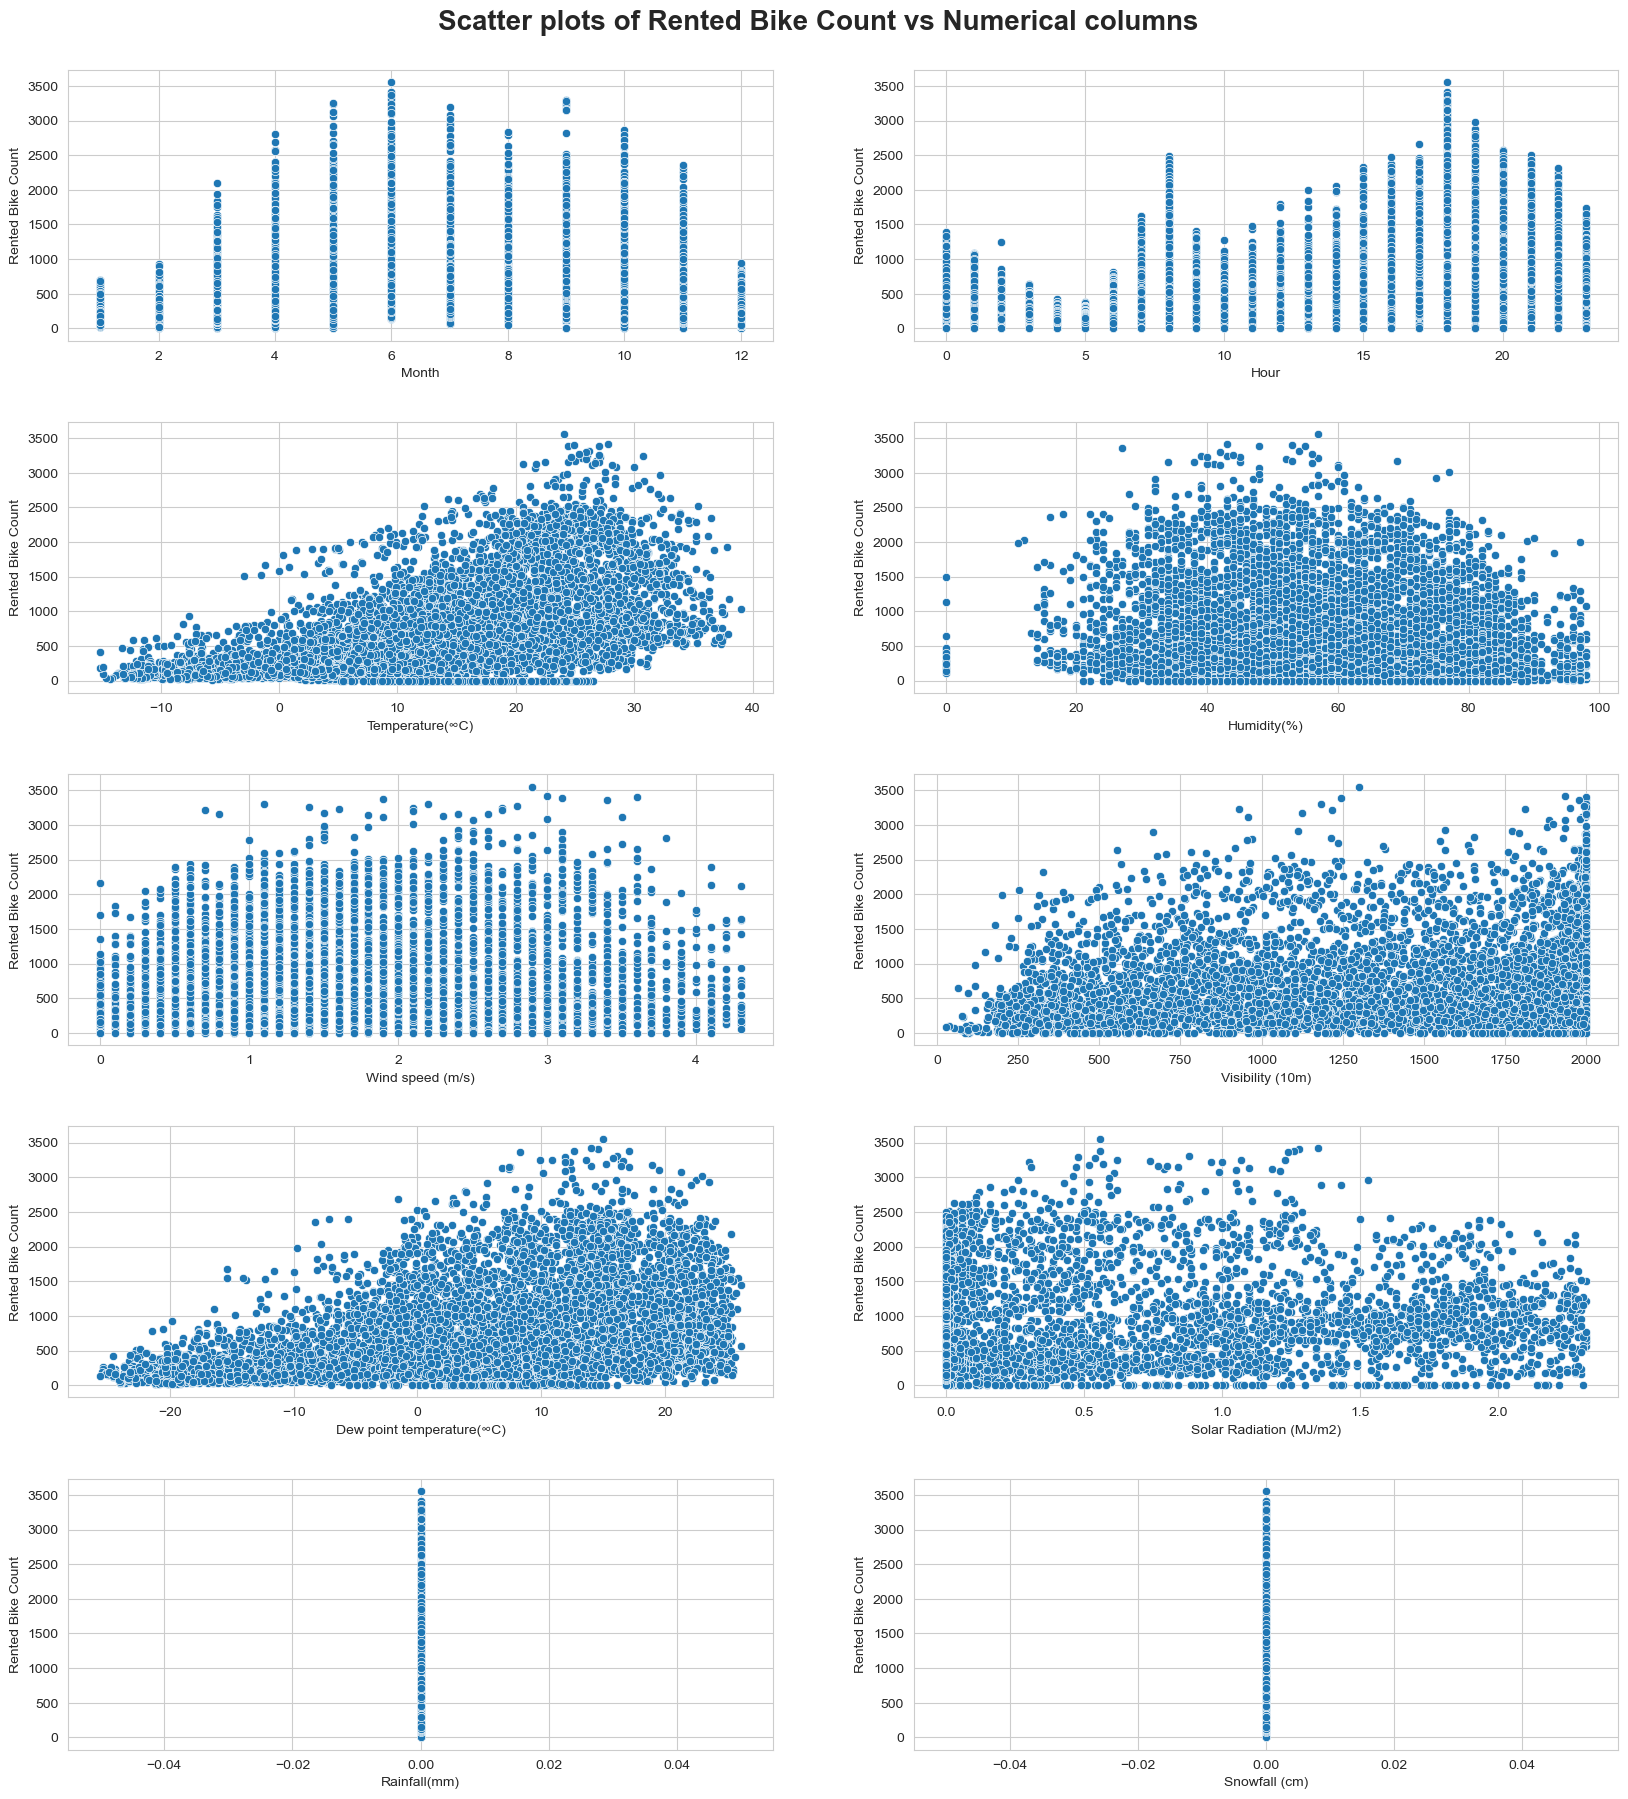

In [123]:
#bivariate graphs based on two numerical variables
numerical_columns =  df_original_copy.select_dtypes('number').columns.drop("Rented Bike Count")

fig,axes = plt.subplots(len(numerical_columns) // 2 , 2, figsize=(20, 20))
for index, column in enumerate(numerical_columns):
        sns.scatterplot(x=column,y='Rented Bike Count',data=df_original_copy, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        
plt.suptitle('Scatter plots of Rented Bike Count vs Numerical columns', fontsize= 20, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.show()

<br>
<ul>
<li> There appears to be a positive correlation between temperature and the number of rented bikes, suggesting that bike rentals increase as the temperature rises.

<li>Bike rentals decline with increasing wind and rainfall because bad weather discourages riding.

<li> It can be seen that more sunlight encourages more bike rentals.

<li> As shown in the graphs, Humidity and visibility do not significantly impact bike rentals.

<li>Conclusion : bike rentals are higher in favorable weather conditions like warmer temperatures, lower wind speeds, and more sunlight. In addition, there are some factors such as humidity and visibility that do not have a clear impact on bike renting.
</ul>
<br><br>

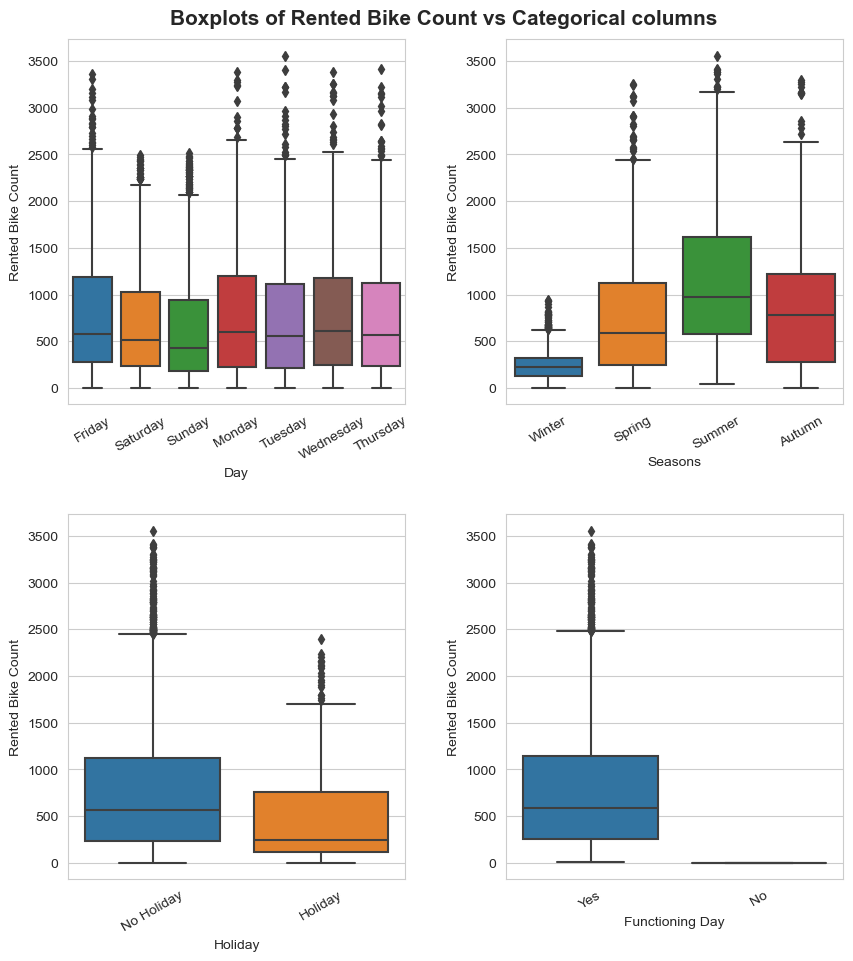

In [124]:
#bivariate graphs based on Rented Bike count and categorical variables
cat_cols =  df_original_copy.select_dtypes('object').columns

fig,axes = plt.subplots(len(cat_cols) // 2, 2, figsize=(10, 10))
for index, column in enumerate(cat_cols):
        sns.boxplot(x=column,y='Rented Bike Count',data=df_original_copy, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        axes.flatten()[index].set_xticklabels(axes.flatten()[index].get_xticklabels(), rotation=30)
        
plt.suptitle('Boxplots of Rented Bike Count vs Categorical columns', fontsize= 15, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.3, wspace = 0.3)
plt.show()

<br>
<ul>
<li>It can be inferred from the above boxplots that the renting of bikes is the highest in the summer season.

<li>Furthermore, throughout the week, the distribution of bike rentals is overall uniform in nature.

<li>However the working days of M-T-W-R display a slightly higher median number of bike rentals, perhaps indicating that the bike rentals might be more popular amongst students and office workers, who are usually active and travelling on these days.

<li>This claim can further be supported by the fact that the bike rentals are higher on non-holiday/non-weekend days as compared to holiday/weekend days. This could also mean that people rent the bikes more for transportation purposes than for entertainment/leisure activity purposes.
</ul>
<br><br>

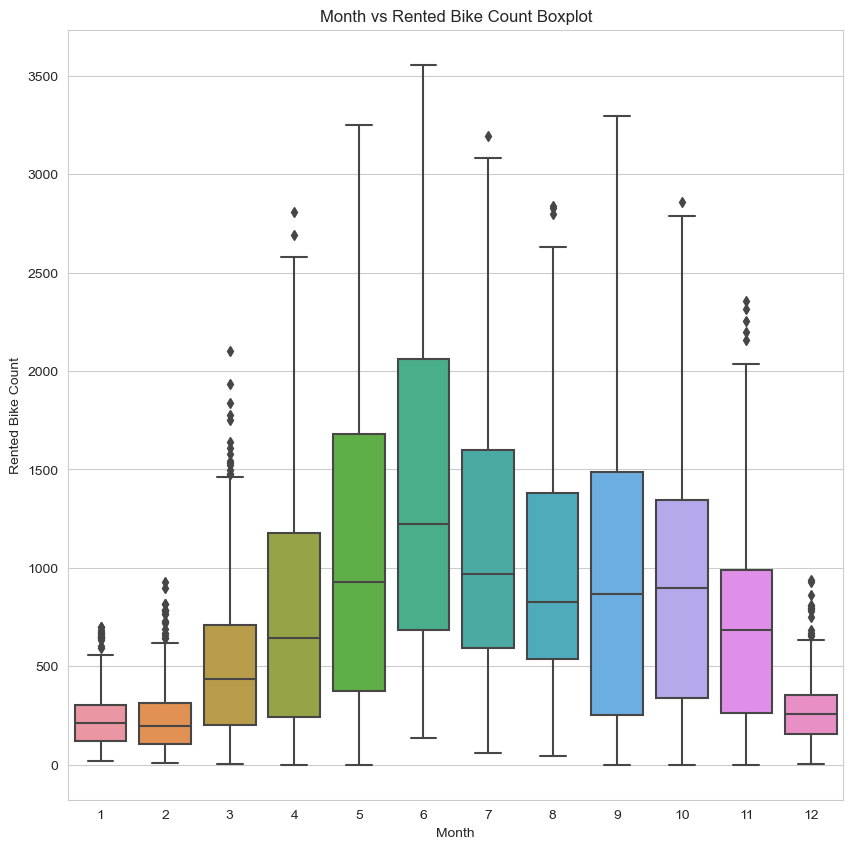

In [125]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Month", y="Rented Bike Count", data=df_original_copy)
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")
plt.title("Month vs Rented Bike Count Boxplot") 
plt.show()

<br>
<ul>
<li>It can be observed from the above boxplot that the number of rented bikes in Seoul drop considerably in the colder months of the year (Months 11 to 2) and are generally higher during the warmer months (Months 5 to 10).

<li>This can supported by the fact that the summers in Seoul (in fact the whole of South Korea) are generally moderately hot with the highest temperatures reaching around 30°C. In contrast, the winters are extremely cold with the average temperature revolving around 0°C. 

<li>The general population would prefer to ride the bikes in a more pleasant climate (i.e summer) than a more physically demanding climate (i.e winter), supporting the overall trend.
</ul>
<br><br>

<a id = 'multivariate_graphs'></a><h2 style=font-size:20px><b><u>Multivariate Graphs</u></h2>

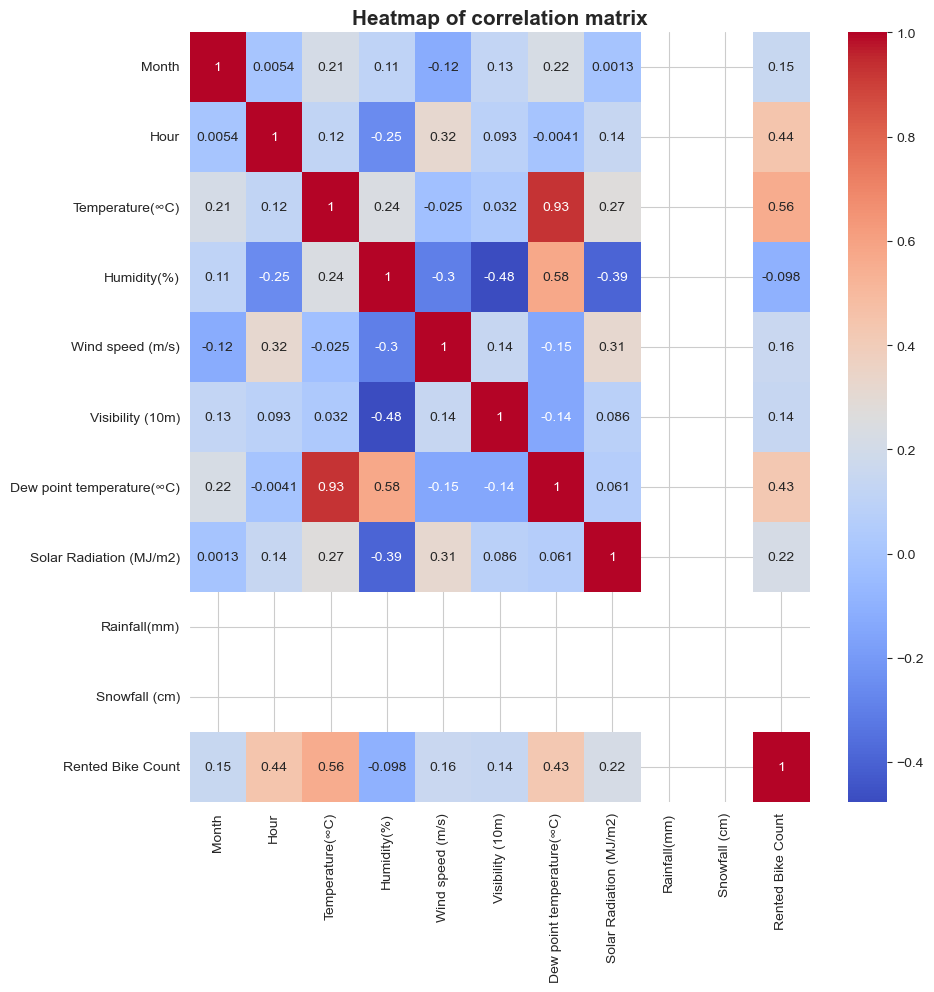

In [126]:
#Multivariate Graphs
correlation_matrix = df_original_copy.select_dtypes(include = np.number).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title("Heatmap of correlation matrix", fontsize= 15, fontweight='bold')
plt.show()

<br>
<ul>
<li>It can be observed from the heatmap that the Temperature column seems to have the highest correlation coefficient among other input columns and the output column Rented Bike Count. This can supported by the idea that most renters would prefer to bike at higher temperatures, instead of cold weather. However, since fewer renters would prefer extremely high temperatures, the correlation is overall not too strong.<br><br>

<li>The Hour and Dew point temperature seem to have nearly the same correlation coefficient with the output column, suggesting that perhaps, the renters do not prefer renting the bikes earlier in the day.<br><br>

<li>The Humidity column is the only column that seems to have a negative correlation with the output column, perhaps suggesting that renters do not prefer riding the bikes in a humid climate/environment.<br><br>

<li>Furthermore, the Dew point temperature and the Temperature appear to have a strong positive correlation, indicating that if one factor increases, the other will most probably increase nearly proportionately as well.<br><br>

<li>The Visibility column appears to have a negative correlation with the Humidity. This is supported by the fact that Humidity causes condensation of air into water droplets in the atmosphere, reducing overall visibility.<br><br>

<li>Research has shown that humidity and solar radiation follow an inverse relationship i.e, when there is high humidity, solar radiation will be low, whereas when the humidity is low, the solar radiation will be high (Tasie et.al, 2018). This fact can be confirmed from the correlation heatmap as the Humidity and Solar Radiation columns appear to have a negative correlation coefficient of -0.38.
</ul>
<br><br>

<a id = 'summary'></a><h2 style=font-size:30px><b><u>Summary</u></h2>

<br>In the dataset analysis, several key observations emerge: the preference for bicycles remains consistent across seasons with autumn being the peak and winter the low point. Bike usage spikes notably on workdays compared to holidays. Variations in rental hours exist with slight increases at certain times. When examining the impact of temperature, there is a nearly equal effect observed between temperatures of 0 and 30 degrees. However, a notable preference and significant deviation among individuals become apparent when the temperature hovers around 12 degrees. Humidity preferences cluster notably around 50-60%, while visibility influences bike usage, with a preference for clearer conditions. Optimal wind speeds for biking range between 1.5 to 2.5, showing a decline in preference at higher speeds. These insights provide valuable context for predicting and optimizing bike rental demand based on diverse environmental factors.<br><br>

<a id = 'model_building'></a><br><h1 style=font-size:30px><b>Model Building & Training</h1>

<a id = 'data_scaling'></a><h2 style=font-size:20px><b><u>Data Scaling</u></h2>

<br>Before training the models on our dataset, let's transform/scale the data so that all the column values are on a similar scale.<br><br>

<br>First, let's see the current data summary statistics and the dataset to determine there are actually any columns with largely different scales.<br><br>

In [127]:
display(df)
print("\n")
df.describe().T # Transpose to have the statistics as the columns

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count
0,12,6,0,-5.200000,37.00000,2.200000,2000,-17.6,0.0,0.0,0.0,4,1,1,254
1,12,6,1,-5.500000,57.65055,0.800000,2000,-17.6,0.0,0.0,0.0,4,1,1,204
2,12,6,2,-6.000000,39.00000,1.623496,2000,-17.7,0.0,0.0,0.0,4,1,1,173
3,12,6,3,-6.200000,40.00000,0.900000,2000,-17.6,0.0,0.0,0.0,4,1,1,107
4,12,6,4,-6.000000,36.00000,2.300000,2000,-18.6,0.0,0.0,0.0,4,1,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,11,6,19,4.200000,34.00000,2.600000,1894,-10.3,0.0,0.0,0.0,3,1,1,1003
7071,11,6,20,3.400000,37.00000,2.300000,2000,-9.9,0.0,0.0,0.0,3,1,1,764
7072,11,6,21,2.600000,39.00000,0.300000,1968,-9.9,0.0,0.0,0.0,3,1,1,694
7073,11,6,22,12.743312,41.00000,1.000000,1859,-9.8,0.0,0.0,0.0,3,1,1,712


,count,mean,std,min,25%,50%,75%,max
Month,7075.0,6.575972,3.452696,1.0,3.0,7.000000,10.00,12.00
Day,7075.0,3.988975,2.005687,1.0,2.0,4.000000,6.00,7.00
Hour,7075.0,11.429682,7.225553,0.0,5.0,11.000000,18.00,23.00
Temperature(∞C),7075.0,12.743312,11.178224,-15.1,4.4,12.743312,21.50,39.00
Humidity(%),7075.0,57.650550,18.188899,0.0,44.0,57.650550,71.00,98.00
Wind speed (m/s),7075.0,1.623496,0.913480,0.0,0.9,1.500000,2.20,4.30
Visibility (10m),7075.0,1472.315901,587.140846,27.0,1002.5,1735.000000,2000.00,2000.00
Dew point temperature(∞C),7075.0,3.949173,12.792099,-25.6,-4.8,4.700000,14.30,26.10
Solar Radiation (MJ/m2),7075.0,0.417358,0.646918,0.0,0.0,0.000000,0.69,2.32
Rainfall(mm),7075.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.00


<br>
<ul>
<li>We can clearly see from the dataset that the values of the Dew point temperature column are significantly larger than that of other columns. This can also be confirmed by comparing the minimum, median and maximum values of the Dew point temperature column with the same of other columns.<br><br>

<li>Similarly, we can observe that the humidity column seems to have a slightly higher scale of values than most of the other columns.<br><br>

<li>Due to this inconsistency in the scales of values, we will apply the <b><i>"Standardization"</i></b> or <b><i>"Standard Scaler"</i></b> method to bring each column's value to a uniform and comparable scale, where each value ∈ [0,1].<br><br>
</ul>
<br><br>

<br>
Before Standardizing the data, we shall split it into training and testing sets.
<br><br>

In [128]:
X = df.iloc[:, :-1] # Selecting the input columns (Note: we have already converted the categorical columns to numerical data type)
y = df.iloc[:, -1] # Selecting only the output column
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 69)

<br>
Now, we shall standardize both the training and testing data. (Note: We will only train the scaler on the training data as we do not want the testing data to influence our scaler or our model)
<br><br>

In [129]:
scaler = preprocessing.StandardScaler()
scaler.fit(np.c_[X_train, y_train])

Scaled_train = scaler.transform(np.c_[X_train, y_train])
X_train = Scaled_train[:, :-1]
y_train = Scaled_train[:, -1]

Scaled_test = scaler.transform(np.c_[X_test, y_test])
X_test = Scaled_test[:, :-1]
y_test = Scaled_test[:, -1]

<a id = "model_training"></a><h2 style=font-size:20px><b><u>Model(s) Training</u></h2>

<br>
Now that our data has been standardized, we can train our regression models more effectively.
<br><br>

<br>
First, we shall train the <b><i>Linear Regression (OLS)</i></b> model.
<br><br>

In [130]:
linear_regression = LinearRegression(fit_intercept=True) # We want the model to fit the intercept as well
linear_regression.fit(X_train, y_train)
y_pred_linear = linear_regression.predict(X_test)
print(f"The Mean Squared Error for the Linear Regression (OLS) model is: {mean_squared_error(y_test, y_pred_linear)}\n")
print(f"The R^2 score for the Linear Regression (OLS) with CV model is: {linear_regression.score(X_test, y_test)}")

The Mean Squared Error for the Linear Regression (OLS) model is: 0.416205702456357

The R^2 score for the Linear Regression (OLS) with CV model is: 0.5593146671893334


<br>
Next, we shall train the <b><i>Ridge Regression</i></b> model.
<br><br>

In [131]:
ridge_regression = Ridge(alpha = 0.5, fit_intercept=True) # We want the model to fit the intercept as well
ridge_regression.fit(X_train, y_train)
y_pred_ridge = ridge_regression.predict(X_test)
print(f"The Mean Squared Error for the Ridge Regression model with alpha = 0.5 is: {mean_squared_error(y_test, y_pred_ridge)}\n")
print(f"The R^2 score for the Ridge Regression model with alpha = 0.5 is: {ridge_regression.score(X_test, y_test)}")

The Mean Squared Error for the Ridge Regression model with alpha = 0.5 is: 0.4162046130665

The R^2 score for the Ridge Regression model with alpha = 0.5 is: 0.5593158206529425


<br>
Next, we shall train the <b><i>Lasso Regression</i></b> model.
<br><br>

In [132]:
lasso_regression = Lasso(alpha = 0.5, fit_intercept=True) # We want the model to fit the intercept as well
lasso_regression.fit(X_train, y_train)
y_pred_lasso = lasso_regression.predict(X_test)
print(f"The Mean Squared Error for the Lasso Regression model with alpha = 0.5 is: {mean_squared_error(y_test, y_pred_lasso)}\n")
print(f"The R^2 score for the Lasso Regression model with alpha = 0.5 is: {lasso_regression.score(X_test, y_test)}")

The Mean Squared Error for the Lasso Regression model with alpha = 0.5 is: 0.9008823262911321

The R^2 score for the Lasso Regression model with alpha = 0.5 is: 0.046131214825234634


<br>
Next, we shall train the <b><i>Ridge Regression</i></b> with Cross Validation model.
<br><br>

In [133]:
ridge_regression_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv = 10, fit_intercept=True) # We want the model to fit the intercept as well
ridge_regression_cv.fit(X_train, y_train)
y_pred_ridge_cv = ridge_regression_cv.predict(X_test)
print(f"The Mean Squared Error for the Ridge Regression with CV model is: {mean_squared_error(y_test, y_pred_ridge_cv)}\n")
print(f"The R^2 score for the Ridge Regression with CV model is: {ridge_regression_cv.score(X_test, y_test)}")

The Mean Squared Error for the Ridge Regression with CV model is: 0.41619176936246044

The R^2 score for the Ridge Regression with CV model is: 0.5593294197746168


<br>
Lastly, we shall train the <b><i>Lasso Regression</i></b> with Cross Validation model.
<br><br>

In [134]:
lasso_regression_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv = 10, fit_intercept=True) # We want the model to fit the intercept as well
lasso_regression_cv.fit(X_train, y_train)
y_pred_lasso_cv = lasso_regression_cv.predict(X_test)
print(f"The Mean Squared Error for the Lasso Regression with CV model is: {mean_squared_error(y_test, y_pred_lasso_cv)}\n")
print(f"The R^2 score for the Lasso Regression with CV model is: {lasso_regression_cv.score(X_test, y_test)}")

The Mean Squared Error for the Lasso Regression with CV model is: 0.416207629880042

The R^2 score for the Lasso Regression with CV model is: 0.5593126264019461


<a id = 'model_selection'></a><h2 style=font-size:20px><b><u>Model Selection</u></h2>

The models and their respective MSEs are as follows:
<br><br>

|               Model                |       MSE       |
|:----------------------------------:|:---------------:|
|      Linear Regression (OLS)       |    0.416205702456357     | 
| Ridge Regression $(\alpha  = 0.5)$ |     0.4162046130665     | 
| Lasso Regression $(\alpha = 0.5)$  |      0.9008823262911321      |
|      Ridge Regression with CV      |      0.41619176936246044      |
|      Lasso Regression with CV      |      0.416207629880042   |

<br><br>

The models and their respective R^2 scores are as follows:
<br><br>

|               Model               | R<sup>2</sup> Score  |
|:---------------------------------:|:--------------------:|
|      Linear Regression (OLS)      |  0.5593146671893334  | 
| Ridge Regression $(\alpha = 0.5)$ |  0.5593158206529425  | 
| Lasso Regression $(\alpha = 0.5)$ | 0.046131214825234634 |
|     Ridge Regression with CV      |  0.5593294197746168  |
|     Lasso Regression with CV      |  0.5593126264019461  |

<br><br>

<br>
As can be observed from the above table, the Ridge Regression with Cross Validation model appears to have the least Mean Squared Error (MSE) as compared to the other Regression models. Thus, we will employ this model for predicting the outputs.
<br><br>

<br>
The following are the model parameters:
<br><br>

In [135]:
print('The best penalty coefficient is:', ridge_regression_cv.alpha_)
print('The best intercept estimates are:', ridge_regression_cv.intercept_)
print('The best coefficient estimates are:', ridge_regression_cv.coef_)

The best penalty coefficient is: 10.0
The best intercept estimates are: 1.7174065048954668e-16
The best coefficient estimates are: [ 0.1118048   0.01960539  0.34969716  0.18130097 -0.24373589  0.03022435
  0.04294477  0.34926621 -0.0169053   0.          0.         -0.10534616
  0.05275877  0.24789298]


<a id = 'results'></a><br><h1 style=font-size:30px><b>Results</h1>

<a id = 'summary_conclusion'></a><h2 style=font-size:20px><b><u>Summary & Conclusion</u></h2>


The project delved into predicting the required bike count per hour for ensuring a stable supply of rental bikes, leveraging environmental factors. Through detailed data analysis and model training, valuable insights were gained regarding the correlation between variables like temperature, humidity, and bike demand. The application of linear regression models facilitated the projection of bike counts, aiding in the optimization of bike availability. This analysis underscores the crucial role of environmental conditions in shaping rental bike demand, offering a pathway towards more efficient bike rental systems.<br>

The model building phase of the project was pivotal in predicting the required bike count per hour, hinging on environmental factors. We began the model training by scaling the training dataset for more effective and efficient training of the model. After scaling, multiple models (Linear regression, Ridge, Lasso, RidgeCV, and LassoCV models) were applied and compared with each other through metrics such as Mean Squared Error (MSE). Through the MSE, the team was able to decide the most accurate model (RidgeCV) for utilization. 

After choosing the model, the alpha$(\alpha)$parameter, the intercept, and the coefficients were found. The intercept was found to be near zero. 

The coefficients provide valuable insights into which environmental factors play a more profound impact on the bike rentals and which factors are not much impactful. Although, the coefficients are based around the scaled data, their relative importance still stands, even if they are scaled back to the original units. For example, it can be found that the Rainfall and Snowfall seems have no impact on the bike rentals. On the other hand, factors such as the Month, Hour of the day, Temperature, Humidity %, the Dew point temperature, whether it is a Functioning day, all appear to have a more significant impact on the model's output compared to the other features.

Bike Rental businesses can leverage the findings of this analysis by understanding the model's parameters (especially by looking at the model's coefficients and their magnitude + sign) and understanding how much impact each environmental feature has on the amount of bikes rented. By doing this, companies can understand when to allocate more bikes in the rental sites due to higher demand and when to recall the bikes for servicing due to reduced demand.

In conclusion, the model provides valuable insights into the impact of various environmental factors and the bike rentals in Seoul. Local companies can take advantage of the model and utilize it to effectively control their bike resources according to the current demand.

<a id = 'future_recommendations'></a><h2 style=font-size:20px><b><u>Future Recommendations</u></h2>

Looking ahead, it would be beneficial to include more details like the time of day or special events that could influence bike demand. Using more advanced models that can better understand how factors like weather impact bike usage could lead to more accurate predictions. Keeping data up-to-date in real-time can ensure that bike availability matches demand effectively. Encouraging bike usage during peak times through engaging initiatives can optimize bike distribution. When expanding the bike system, it's important to do so thoughtfully, considering environmental impact and aligning growth with data-driven insights on when and where bikes are most needed.

<a id = 'operationalization'></a><br><h1 style=font-size:30px><b>Operationalization</h1>

General Guidelines for Adopting the RidgeCV Methodology:



   <li>Scale Features: Use methods like StandardScaler to ensure all features are on a similar scale.
   <li>Handle Missing Data: Fill in or remove missing values to keep the model reliable.
   <li>Encode Categorical Data: Convert categories (like weather types) into numerical form with techniques like one-hot encoding.



   <li>Cross-Validation: Use methods like K-Fold cross-validation to find the best regularization parameter (alpha).
   <li>Automatic Tuning: RidgeCV will test various alpha values to pick the best one.




   <li>Fit the Model: Train RidgeCV on your data with the cross-validation process.
   <li>Evaluate Performance: Use metrics like Mean Squared Error (MSE) to check how well the model performs.
   
 


Potenial Issues:

<li>Outliers: Extreme values can affect the model. Consider handling them or using robust methods.

<li>Complex Coefficients: The model may produce coefficients that are hard to interpret, especially if they are very small.

<li>Choosing Alpha: Picking the wrong alpha can lead to overfitting or underfitting. Use cross-validation to help find the right value.

<li>Scalability: Ensure the model can handle the size of your data and predictions.


<a id = 'references'></a><br><h1 style=font-size:30px><b>References</h1>

<br>
<ul>
<li>Tasie, N., Cookey, C.I., Banyie, L. (2018) 'The Effect of Relative Humidity on the Solar Radiation Intensity in Port Harcourt, Nigeria'. Retrieved from <a href = "https://www.researchgate.net/publication/328335896_The_Effect_of_Relative_Humidity_on_the_Solar_Radiation_Intensity_in_Port_Harcourt_Nigeria">https://www.researchgate.net/publication/328335896_The_Effect_of_Relative_Humidity_on_the_Solar_Radiation_Intensity_in_Port_Harcourt_Nigeria</a>
</ul>
<br><br>